In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_ = df[df['job_title_short'] == 'Data Analyst']

In [13]:
df_exploded = df.explode('job_skills')
skills_stats = df_exploded.groupby("job_skills").agg(
    skill_count=("job_skills", "count"),
    median_salary=("salary_year_avg", "median")
)
skills_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(10)

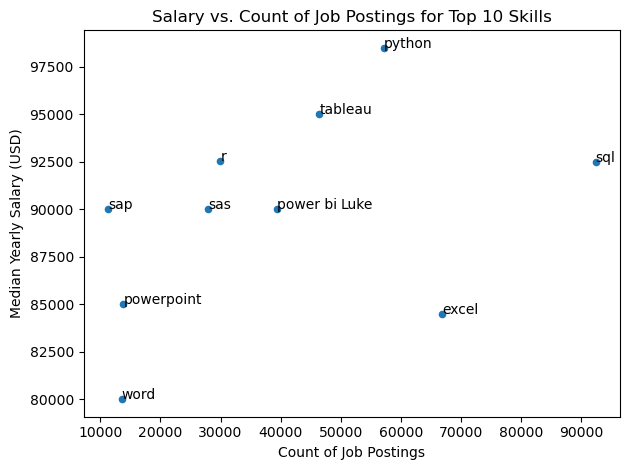

In [23]:
 skills_stats.plot(kind="scatter", x="skill_count", y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary (USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats["skill_count"].iloc[i], skills_stats["median_salary"].iloc[i], txt)
plt.text(50000, 90000, "Luke")
plt.show()